In [1]:
from abc import ABC, abstractmethod


class Drug(ABC):
    def apply(self, person):
        # somehow reduce person's symptoms
        pass


class AntipyreticDrug(Drug): pass


class Aspirin(AntipyreticDrug):
    '''A cheaper version of the fever/pain killer.'''
    def __init__(self, dose):
        self.dose = dose
        self.efficiency = 0.5
        
    def apply(self, person):
        person.temperature = max(36.6, person.temperature - self.dose * self.efficiency)


class Ibuprofen(AntipyreticDrug):
    '''A more efficient version of the fever/pain killer.'''
    def __init__(self, dose):
        self.dose = dose
        
    def apply(self, person):
        person.temperature = 36.6


class RehydrationDrug(Drug): pass

class Glucose(RehydrationDrug):
    '''A cheaper version of the rehydration drug.'''
    def __init__(self, dose):
        self.dose = dose
        self.efficiency = 0.1
        
    def apply(self, person):
        person.water = min(person.water + self.dose * self.efficiency,
                            0.6 * person.weight)


class Rehydron(RehydrationDrug):
    '''A more efficient version of the rehydration drug.'''
    def __init__(self, dose):
        self.dose = dose
        self.efficiency = 1.0
        
    def apply(self, person):
        person._water = 0.6 * person.weight


class AntivirusDrug(Drug): pass

class Placebo(AntivirusDrug):
    def __init__(self, dose):
        self.dose = dose

    def apply(self, person): pass


class AntivirusSeasonalFlu(AntivirusDrug):
    def __init__(self, dose):
        self.dose = dose
        self.efficiency = 1.0
        
    def apply(self, person):
        if isinstance(person.virus, SeasonalFluVirus):
            person.virus.strength -= self.dose * self.efficiency
            
        elif isinstance(person.virus, SARSCoV2):
            person.virus.strength -= self.dose * self.efficiency / 10.0


class AntivirusSARSCoV2(AntivirusDrug):
    def __init__(self, dose):
        self.dose = dose
        self.efficiency = 0.1
        
    def apply(self, person):
        if isinstance(person.virus, SARSCoV2):
            person.virus.strength -= self.dose * self.efficiency


class AntivirusCholera(AntivirusDrug):
    def __init__(self, dose):
        self.dose = dose
        self.efficiency = 0.1
        
    def apply(self, person):
        if isinstance(person.virus, Cholera):
            person.virus.strength -= self.dose * self.efficiency


In [2]:
from typing import List


class DrugRepository(ABC):
    def __init__(self):
        self.treatment = []
        
    @abstractmethod
    def get_antifever(self, dose) -> Drug: pass
    
    @abstractmethod
    def get_rehydration(self, dose) -> Drug: pass
    
    @abstractmethod
    def get_seasonal_antivirus(self, dose) -> Drug: pass
    
    @abstractmethod
    def get_sars_antivirus(self, dose) -> Drug: pass
    
    @abstractmethod
    def get_cholera_antivirus(self, dose) -> Drug: pass
    
    def get_treatment(self):
        return self.treatment


class CheapDrugRepository(DrugRepository):
    def get_antifever(self, dose) -> Drug:
        return Aspirin(dose)

    def get_rehydration(self, dose) -> Drug:
        return Glucose(dose)

    def get_seasonal_antivirus(self, dose) -> Drug:
        return Placebo(dose)

    def get_sars_antivirus(self, dose) -> Drug:
        return Placebo(dose)

    def get_cholera_antivirus(self, dose) -> Drug:
        return Placebo(dose)


class ExpensiveDrugRepository(DrugRepository):
    def get_antifever(self, dose) -> Drug:
        return Ibuprofen(dose)

    def get_rehydration(self, dose) -> Drug:
        return Rehydron(dose)

    def get_seasonal_antivirus(self, dose) -> Drug:
        return AntivirusSeasonalFlu(dose)

    def get_sars_antivirus(self, dose) -> Drug:
        return AntivirusSARSCoV2(dose)

    def get_cholera_antivirus(self, dose) -> Drug:
        return AntivirusCholera(dose)

In [3]:
class AbstractPrescriptor(ABC):
    def __init__(self, drug_repository):
        self.drug_repository = drug_repository
        
    @abstractmethod
    def create_prescription(self) -> List[Drug]:
        pass
    

class SeasonalFluPrescriptor(AbstractPrescriptor):
    def __init__(self, drug_repository, antifever_dose, antivirus_dose):
        super().__init__(drug_repository)
        self.antifever_dose = antifever_dose
        self.antivirus_dose = antivirus_dose

    def create_prescription(self) -> List[Drug]:
        return [
            self.drug_repository.get_antifever(self.antifever_dose),
            self.drug_repository.get_seasonal_antivirus(self.antivirus_dose)
        ]

    
class CovidPrescriptor(AbstractPrescriptor):
    def __init__(self, drug_repository, antifever_dose, antivirus_dose):
        super().__init__(drug_repository)
        self.antifever_dose = antifever_dose
        self.antivirus_dose = antivirus_dose

    def create_prescription(self) -> List[Drug]:
        return [
            self.drug_repository.get_antifever(self.antifever_dose),
            self.drug_repository.get_seasonal_antivirus(self.antivirus_dose)
        ]


class CholeraPrescriptor(AbstractPrescriptor):
    def __init__(self, drug_repository, rehydradation_dose, antivirus_dose):
        super().__init__(drug_repository)
        self.rehydradation_dose = rehydradation_dose
        self.antivirus_dose = antivirus_dose

    def create_prescription(self) -> List[Drug]:
        return [
            self.drug_repository.get_rehydration(dose=self.rehydradation_dose),
            self.drug_repository.get_cholera_antivirus(self.antivirus_dose)
        ]


def get_prescription_method(disease_type, drug_repository):

    if InfectableType.SeasonalFlu == disease_type:
        return SeasonalFluPrescriptor(drug_repository, 1, 1)

    elif InfectableType.Cholera == disease_type:
        return CovidPrescriptor(drug_repository, 1, 1)

    elif InfectableType.SARSCoV2 == disease_type:
        return CholeraPrescriptor(drug_repository, 1, 1)


    else:
        raise ValueError()

In [4]:
from abc import ABC, abstractmethod

class Observer: pass

class Observable(ABC):
    @abstractmethod
    def attach(self, observer: Observer):
        pass
    
    @abstractmethod
    def detach(self, observer: Observer):
        pass
    
    @abstractmethod
    def notify(self):
        pass

In [5]:
class Person:
    MAX_TEMPERATURE_TO_SURVIVE = 43.0
    LOWEST_WATER_PCT_TO_SURVIVE = 0.4
    
    LIFE_THREATENING_TEMPERATURE = 40.0
    LIFE_THREATENING_WATER_PCT = 0.5
    
    def __init__(self, home_position=(0, 0), age=30, weight=70):
        self.virus = None
        self.antibody_types = set()
        self.temperature = 36.6
        self.weight = weight
        self.water = 0.6 * self.weight
        self.age = age
        self.home_position = home_position
        self.position = home_position
        self.state = Healthy(self)
        self.at_hospital = False
        self._observers = []
    
    def day_actions(self):
        self.state.day_actions()

    def night_actions(self):
        self.state.night_actions()

    def interact(self, other):
        self.state.interact(other)

    def get_infected(self, virus):
        self.state.get_infected(virus)
    
    def is_close_to(self, other):
        return self.position == other.position
    
    def fightvirus(self):
        if self.virus:
            self.virus.strength -= (5.0 / self.age)
        
    def progress_disease(self):
        if self.virus:
            self.virus.cause_symptoms(self)

    def set_state(self, state):
        self.state = state
        self.notify()
    
    def is_life_threatening_condition(self):
        return self.temperature >= Person.LIFE_THREATENING_TEMPERATURE or \
            self.water / self.weight <= Person.LIFE_THREATENING_WATER_PCT
    
    def is_life_incompatible_condition(self):        
        return self.temperature >= Person.MAX_TEMPERATURE_TO_SURVIVE or \
            self.water / self.weight <= Person.LOWEST_WATER_PCT_TO_SURVIVE

    def attach(self, observer: Observer):
        self._observers.append(observer)
    
    def detach(self, observer: Observer):
        self._observers.remove(observer)

            
    def notify(self):
        for observer in self._observers:
            observer.update(self)

In [6]:
class Hospital:
    def __init__(self, capacity, doctor, drug_repository):
        self.doctor = doctor
        self.drug_repository = drug_repository
        self.capacity = capacity
        self.patients = []
        self.tests = []
        self._observers = []

    def _treat_patient(self, patient):
        # 1. identify disease
        if patient.virus is not None:
          disease_type = patient.virus.get_type()
          prescription_method = get_prescription_method(disease_type, self.drug_repository)

          # 2. understand dose

          # 3. compose treatment
          prescription_drugs = prescription_method.create_prescription()

          # 4. apply treatment
          for drug in prescription_drugs:
            # patient.take_drug(drug)
            drug.apply(patient)

        else:
            # 5. release patient from hospital
            self.patients.remove(patient)
            self.notify()

    def treat_patients(self):
        for patient in self.patients:
            self._treat_patient(patient)  

    def has_free_places(self):
        return len(self.patients) < self.capacity
    
    def is_not_empty(self):
        return len(self.patients) > 0

    def add_patient(self, patient: Person):
        self.patients.append(patient)
        self.notify()
            
    def drop_patient(self, patient: Person):
        self.patients.pop()
        self.notify()

    def attach(self, observer: Observer):
        self._observers.append(observer)
    
    def detach(self, observer: Observer):
        self._observers.remove(observer)

    def notify(self):
        for observer in self._observers:
            observer.update(self)

In [7]:
class Observer(ABC):
    
    @abstractmethod
    def update(self, subject: Observable):
        pass
    
class InfectedObserver(Observer):
    def __init__(self):
        self._infectedCount = 0
    
    def update(self, subject: Person):
        statePerson = type(subject.state)
        
        if statePerson is type(Healthy(None)) or statePerson is type(Dead(None)):
            self._infectedCount -= 1
        
        if statePerson is type(AsymptomaticSick(None)) or statePerson is type(SymptomaticSick(None)):
            self._infectedCount += 1
        
    def getInfectedCount(self):
        return self._infectedCount
        
class HospitalizedObserver(Observer):
    def __init__(self):
        self._hospitals = {}
        self._hospitalizedCounter = 0
    
    def update(self, subject: Hospital):
        self._hospitals[subject] = len(subject.patients)
        
        self._hospitalizedCounter = 0
        
        for key in self._hospitals:
            self._hospitalizedCounter += self._hospitals[key]
        # self._hospitalizedCounter = len(subject.patients)
        
    def getHospitalizedCount(self):
        return self._hospitalizedCounter
        

class DeathObserver(Observer):
    def __init__(self):
        self._deathCount = 0
    
    def update(self, subject: Person):
        statePerson = type(subject.state)
        
        if statePerson is type(Dead(None)):
            self._deathCount += 1
            
    def getDeathCount(self):
        return self._deathCount
        
class RecoveredObserver(Observer):
    def __init__(self):
        self._recoveredCount = 0
    
    def update(self, subject: Person):
        typeVirus = type(subject.antibody_types)
        # print('S', subject.antibody_types)
        if len(subject.antibody_types) > 0:
            # print('RECOVERED')
            self._recoveredCount += 1
            
    def getRecoveredCount(self):
        return self._recoveredCount
        
        
class AntibodyObserver(Observer):
    def __init__(self):
        self._antibodyCount = 0
    
    def update(self, subject: Person):
        typeVirus = type(subject.antibody_types)
        # print('a', subject.antibody_types)
        if len(subject.antibody_types) > 0:
            # print('ANTIBODY')
            self._antibodyCount += 1
            
    def getAntibodyCount(self):
        return self._antibodyCount

In [8]:
from enum import Enum
from abc import ABC, abstractmethod
from random import expovariate, uniform, randint

class Infectable(ABC):
    def __init__(self, strength=1.0, contag=1.0):
        # contag is for contagiousness so we have less typos
        self.strength = strength
        self.contag = contag

    @abstractmethod
    def cause_symptoms(self, person):
        pass
    
    
class SeasonalFluVirus(Infectable):
    def cause_symptoms(self, person):
        person.temperature += 0.25

    def get_type(self):
        return InfectableType.SeasonalFlu
    
    
class SARSCoV2(Infectable):
    def cause_symptoms(self, person):
        person.temperature += 0.5

    def get_type(self):
        return InfectableType.SARSCoV2


class Cholera(Infectable):
    def cause_symptoms(self, person):
        person.water -= 1.0

    def get_type(self):
        return InfectableType.Cholera
    

class InfectableType(Enum):
    SeasonalFlu = 1
    SARSCoV2 = 2
    Cholera = 3

    
def get_infectable(infectable_type: InfectableType):
    if InfectableType.SeasonalFlu == infectable_type:
        return SeasonalFluVirus(strength=expovariate(10.0), contag=expovariate(10.0))
    
    elif InfectableType.SARSCoV2 == infectable_type:
        return SARSCoV2(strength=expovariate(2.0), contag=expovariate(2.0))
    
    elif InfectableType.Cholera == infectable_type:
        return Cholera(strength=expovariate(2.0), contag=expovariate(2.0))
    
    else:
        raise ValueError()

In [9]:
from abc import ABC, abstractmethod


min_i, max_i = 0, 100
min_j, max_j = 0, 100
    

class State(ABC):
    def __init__(self, person): 
        self.person = person
        
    @abstractmethod
    def day_actions(self): pass

    @abstractmethod
    def night_actions(self): pass

    @abstractmethod
    def interact(self, other): pass

    @abstractmethod
    def get_infected(self, virus): pass


class Healthy(State):
    def day_actions(self):
        # different for CommunityPerson?!
        self.person.position = (randint(min_j, max_j), randint(min_i, max_i))
        self.at_hospital = False

    def night_actions(self):
        self.person.position = self.person.home_position

    def interact(self, other: Person): pass

    def get_infected(self, virus):
        if virus.get_type() not in self.person.antibody_types:
            self.person.virus = virus
            self.person.set_state(AsymptomaticSick(self.person))


class AsymptomaticSick(State):
    DAYS_SICK_TO_FEEL_BAD = 2
    
    def __init__(self, person):
        super().__init__(person)
        self.days_sick = 0

    def day_actions(self):
        # different for CommunityPerson?!
        self.person.position = (randint(min_j, max_j), randint(min_i, max_i))

    def night_actions(self):
        self.person.position = self.person.home_position
        if self.days_sick == AsymptomaticSick.DAYS_SICK_TO_FEEL_BAD:
            self.person.set_state(SymptomaticSick(self.person))
        self.days_sick += 1

    def interact(self, other):
        other.get_infected(self.person.virus)

    def get_infected(self, virus): pass


class SymptomaticSick(State):
    def day_actions(self):
        self.person.progress_disease()
        health_dept = context.health_dept

        if self.person.is_life_threatening_condition():
            if not self.person.at_hospital:
                health_dept.hospitalize(self.person)

        if self.person.is_life_incompatible_condition():
            health_dept.discharge(self.person)
            self.person.set_state(Dead(self.person))
        
    def night_actions(self):
        # try to fight the virus
        self.person.fightvirus()
        if self.person.virus.strength <= 0:
            self.person.antibody_types.add(self.person.virus.get_type())
            health_dept = context.health_dept
            health_dept.discharge(self.person)
            self.person.set_state(Healthy(self.person))
            # print(self.person.antibody_types)
            self.person.virus = None

    def interact(self, other): pass

    def get_infected(self, virus): pass

    
class Dead(State):
    def day_actions(self): pass

    def night_actions(self): pass

    def interact(self, other): pass

    def get_infected(self, virus): pass


In [10]:
class DepartmentOfHealth:
    def __init__(self, hospitals):
        self.hospitals = hospitals

    def hospitalize(self, patient: Person):
        for hospital in self.hospitals:
            if hospital.has_free_places():
                hospital.add_patient(patient)
                break
        # print('hospitalization')

    def discharge(self, patient: Person):
        for hospital in self.hospitals:
            if hospital.is_not_empty():
                hospital.drop_patient(patient)
                break
        # print(patient.state)

    def monitor_situation(self):
        pass
      
    
    def issue_policy(self):
        pass
    

In [11]:
class GlobalContext:
    def __init__(self, canvas, persons, health_dept):
        self.canvas = canvas
        self.persons = persons
        self.health_dept = health_dept

In [12]:
infectedPeople = []
hospitalizedPeople = []
deathPeople = []
recoveredPeople = []
peopleWithAntibodies = []
days = []

# obervers
infectedObserver = InfectedObserver()
hospitalizedObserver = HospitalizedObserver()
deathObserver = DeathObserver()
recoveredObserver = RecoveredObserver()
antibodyObserver = AntibodyObserver()

def simulate_day(context):
    persons, health_dept, hospitals = context.persons, context.health_dept, context.health_dept.hospitals

    # health_dept.make_policy()

    for hospital in hospitals:
        hospital.treat_patients()
    
    for person in persons:
        person.day_actions()
    
    for person in persons:       
        for other in persons:
            if person is not other and person.is_close_to(other):
                person.interact(other)
            # print(person.state)

                
    for person in persons:
        person.night_actions()
        
    infectedPeople.append(infectedObserver.getInfectedCount())
    hospitalizedPeople.append(hospitalizedObserver.getHospitalizedCount())
    deathPeople.append(deathObserver.getDeathCount())
    recoveredPeople.append(recoveredObserver.getRecoveredCount())
    peopleWithAntibodies.append(antibodyObserver.getAntibodyCount())
    days.append(day)

In [13]:
from random import randint
import random
import numpy as np


def create_persons(min_j, max_j, min_i, max_i, n_persons):
    min_age, max_age = 1, 90
    min_weight, max_weight = 30, 120

    inf = np.array([random.randint(0, n_persons - 1) for i in range(0, int(n_persons * 0.6))])
    persons = [
        Person(
            home_position=(randint(min_j, max_j), randint(min_i, max_i)),
            age=randint(min_age, max_age),
            weight=randint(min_weight, max_weight),
        )
        for i in range(n_persons)
    ]

    tmp = np.unique(inf)

    for i in range(0,  int(len(tmp)*0.2)):
      persons[tmp[i]].get_infected(SeasonalFluVirus(strength=1.0))

    for i in range( int( len(tmp)*0.2), int(len(tmp)*0.6)):
      persons[tmp[i]].get_infected(SARSCoV2(strength=1.0))

    for i in range( int(len(tmp)*0.6),  len(tmp)):
      persons[tmp[i]].get_infected(Cholera(strength=1.0))


    return persons


def create_department_of_health(hospitals):
    return DepartmentOfHealth(hospitals)


def create_hospitals(n_hospitals):
    hospitals = [
        Hospital(capacity=100, doctor=10,drug_repository=CheapDrugRepository())
        for i in range(n_hospitals)
    ]
    return hospitals


def initialize():
    # our little country
    min_i, max_i = 0, 100
    min_j, max_j = 0, 100
    
    # our citizen
    n_persons = 1000
    persons = create_persons(min_j, max_j, min_i, max_i, n_persons)
        
    # our healthcare system
    n_hospitals = 4
    hospitals = create_hospitals(n_hospitals)
    
    health_dept = create_department_of_health(hospitals)
    
    for person in persons:
        person.attach(infectedObserver)
        person.attach(deathObserver)
        person.attach(recoveredObserver)
        person.attach(antibodyObserver)
        
    for hospital in hospitals:
        hospital.attach(hospitalizedObserver)
    
    # global context
    context = GlobalContext(
        (min_j, max_j, min_i, max_i),
        persons,
        health_dept
    )

    return context

In [14]:
!pip install tqdm
import tqdm

In [15]:
context = initialize()

for day in tqdm.tqdm(range(100)):
    simulate_day(context)

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


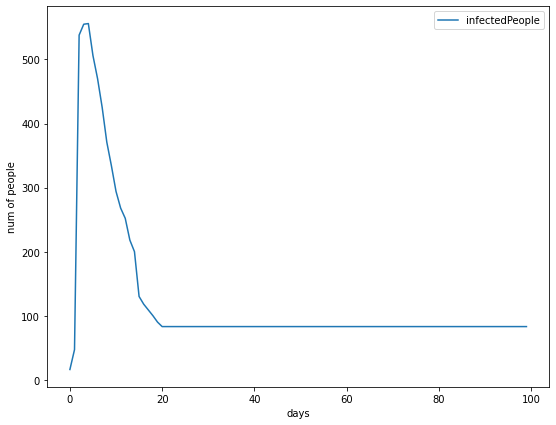

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.plot(days, infectedPeople, label='infectedPeople')
plt.legend()
plt.ylabel('num of people')
plt.xlabel('days')
plt.show()

Text(0.5, 0, 'days')

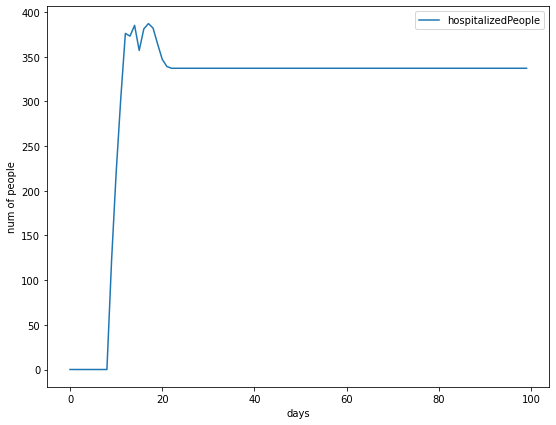

In [17]:
plt.figure(figsize=(9,7))
plt.plot(days, hospitalizedPeople, label='hospitalizedPeople')
plt.legend()
plt.ylabel('num of people')
plt.xlabel('days')

Text(0.5, 0, 'days')

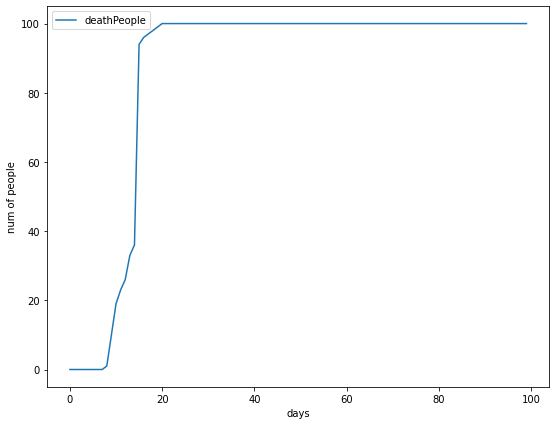

In [18]:
plt.figure(figsize=(9,7))
plt.plot(days, deathPeople, label='deathPeople')
plt.legend()
plt.ylabel('num of people')
plt.xlabel('days')

Death people left in the hospital.

Text(0.5, 0, 'days')

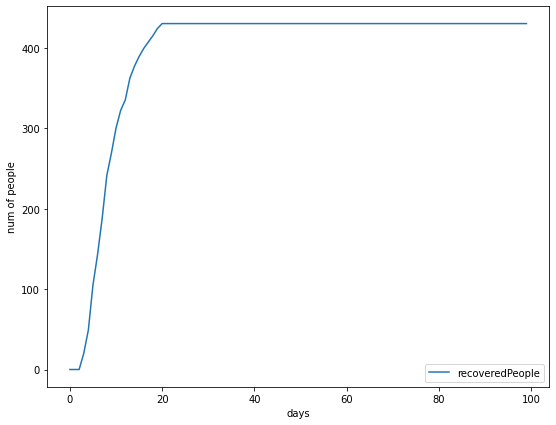

In [19]:
plt.figure(figsize=(9,7))
plt.plot(days, recoveredPeople, label='recoveredPeople')
plt.legend()
plt.ylabel('num of people')
plt.xlabel('days')

Text(0.5, 0, 'days')

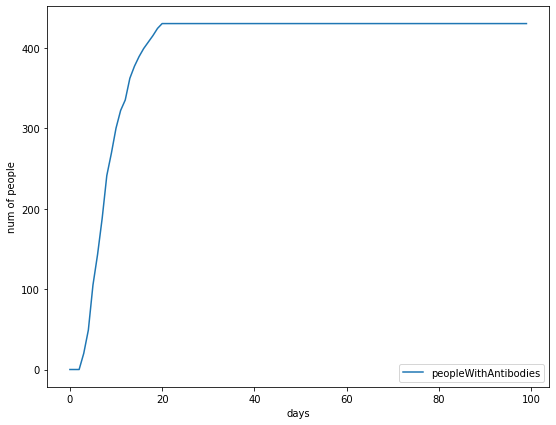

In [20]:
plt.figure(figsize=(9,7))
plt.plot(days, peopleWithAntibodies, label='peopleWithAntibodies')
plt.legend()
plt.ylabel('num of people')
plt.xlabel('days')

---